# Esplorare gli embeddings

## Introduzione

In questa parte della lezione esploreremo un modello di "word embeddings" dell'italiano addestrato con [word2vec](https://it.wikipedia.org/wiki/Word2vec). Word2vec è una tecnica che consente di creare embeddings (statici) di parole, attraverso due algoritmi alternativi, [skip-gram](https://en.wikipedia.org/wiki/Word2vec#Skip-gram) e Continuous Bag of Words [CBOW](https://en.wikipedia.org/wiki/Word2vec#Continuous_Bag_of_Words_(CBOW)).

Gli embeddings che useremo sono scaricabili da [questa](https://huggingface.co/osiria/word2vec-light-uncased-it/tree/main) pagina web; sono stati creati usando l'implementazione di word2vec disponibile nella libreria python [`gensim`](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#). Non è specificato quale algoritmo sia stato usato per crearli, ma di default `gensim` usa CBOW.

### Lancialo in binder!

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/francescomambrini/myclasses/HEAD?urlpath=%2Fdoc%2Ftree%2FCompLing%2Fesplorare_word2vec.ipynb)

### Installazione

Se volete replicare il codice su [MyBinder](https://mybinder.org/v2/gh/francescomambrini/myclasses/HEAD) è necessario installare diverse librerie e il modello di embeddings

In [2]:
# !pip install -q huggingface_hub numpy matplotlib scikit-learn gensim

Per scaricare e installare il modello:

In [ ]:
from huggingface_hub import hf_hub_download
from gensim.models import KeyedVectors

repo_id = "osiria/word2vec-light-uncased-it"

model_file = hf_hub_download(repo_id=repo_id, filename="word2vec.wordvectors")
vectors_file = hf_hub_download(repo_id=repo_id, filename="word2vec.wordvectors.vectors.npy")

### Caricare le librerie

In [7]:
from gensim.models import KeyedVectors
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

## Esperimenti con il modello

### Le *n* parole più simili

Il modello è disponibile nella cartella `lib/word2vec-light-uncased-it`. Carichiamolo ed eseguiamo il test suggerito nella pagina di documentazione. Il test suggerisce di richiedere le 5 parole più "vicine" a `poesia`.

In [ ]:
# model_file = "../lib/word2vec-light-uncased-it/word2vec.wordvectors"

model = KeyedVectors.load(model_file, mmap='r')

model.most_similar("poesia", topn=5)

[('letteratura', 0.8193784356117249),
 ('poetica', 0.8115736246109009),
 ('narrativa', 0.7729099988937378),
 ('drammaturgia', 0.7576395869255066),
 ('prosa', 0.755203366279602)]

Proviamo con un altro esempio, la parola `cucciolo`:

In [3]:
model.most_similar("cucciolo", topn=5)

[('cane', 0.834071934223175),
 ('pulcino', 0.8222324848175049),
 ('cagnolino', 0.8183971643447876),
 ('gattino', 0.8140707612037659),
 ('puledro', 0.7914999127388)]

### Visualizzare gli embeddings

#### Proiettiamo alcune parole in uno spazio

Prendiamo alcune parole di esempio:
- Colori:
    - rosso
    - blu
    - verde
    - giallo
- Città:
    - Roma
    - Milano
    - Napoli
    - Venezia
    - Vienna
    - Bangkok
    - Pechino
- Cibo:
    - pizza
    - pasta
    - gelato
    - risotto
    - latte
    - sushi
    - maccheroni
- Animali
    - cane
    - gatto
    - cavallo
    - pecora
    - pappagallo

Vediamo come si dispongono nello spazio.

**Nota bene**: c'è una piccolo "trucco" in quello che abbiamo fatto! Vediamo se riuscite a capire quale. Suggerimento: pensate al concetto di **dimensioni**! Vedete [qui](https://it.wikipedia.org/wiki/Analisi_delle_componenti_principali) se volete approfondire la soluzione.

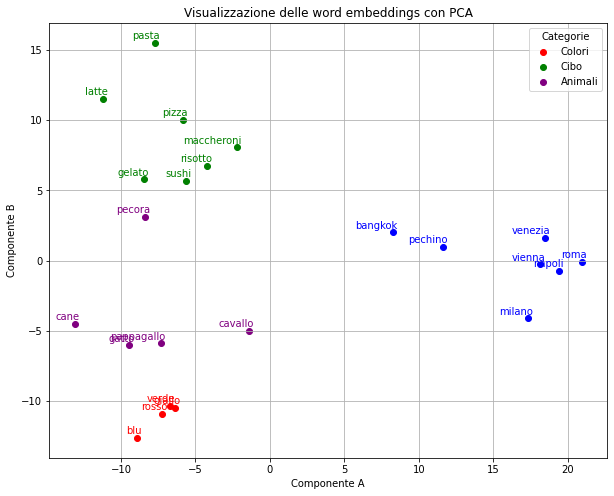

In [ ]:
# Define categories with corresponding words
categories = {
    'Colori': ["rosso", "blu", "verde", "giallo"],
    'Città': ["Roma", "Milano", "Napoli", "Venezia", "Bangkok", "Pechino", "Vienna"],
    'Cibo': ["pizza", "pasta", "gelato", "risotto", 'latte', "sushi", "maccheroni"],
    'Animali': ["cane", "gatto", "cavallo", "pecora", 'pappagallo'], #, "manzo"],
    'Altro': []  # Empty for now, can be filled during live demonstration
}

# Prepare lists for words, their vectors, and colors
words, word_vectors, colors = [], [], []
color_map = {'Colori': 'red', 'Città': 'blue', 'Cibo': 'green', 'Animali': 'purple', 'Altro': 'gray'}
category_labels = set()

for category, words_list in categories.items():
    for word in words_list:
        word = word.lower()
        if word in model:
            words.append(word)
            word_vectors.append(model[word])
            colors.append(color_map[category])

# Convert list to numpy array for plotting
word_vectors = np.array(word_vectors)

# Function to plot using t-SNE and PCA
def plot_embeddings(word_vectors, words, colors, method='tsne'):
    if method == 'tsne':
        embeddings = TSNE(n_components=2, random_state=42).fit_transform(word_vectors)
    else:  # PCA
        embeddings = PCA(n_components=2).fit_transform(word_vectors)
    
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        # Determine the category for the current word
        for category, words_list in categories.items():
            if word in words_list:
                current_category = category
                break
        
        # Plot each word and label it, add to legend if not already added
        if current_category not in category_labels:
            plt.scatter(embeddings[i, 0], embeddings[i, 1], color=colors[i], label=current_category)
            category_labels.add(current_category)
        else:
            plt.scatter(embeddings[i, 0], embeddings[i, 1], color=colors[i])
        
        plt.annotate(word, xy=(embeddings[i, 0], embeddings[i, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', color=colors[i])

    plt.legend(title='Categorie')
    plt.title(f"Visualizzazione delle word embeddings con {method.upper()}")
    plt.xlabel('Componente A')
    plt.ylabel('Componente B')
    plt.grid(True)
    plt.show()

plot_embeddings(word_vectors, words, colors, method='pca')


#### Clustering gerarchico

Oppure, per visualizzare gli embedding possiamo usare un **algoritmo di clustering**, ovvero un metodo statistico **non supervisionato** che permette di raggruppare i dati in base alla loro somiglianza.

Il **clustering gerarchico** può seguire due strategie:

- `Clustering divisivo` (top-down): parte da un unico grande insieme contenente tutti i dati, che viene poi suddiviso progressivamente in gruppi più piccoli;

- `Clustering agglomerativo` (bottom-up): parte da ogni dato come un insieme a sé stante, e unisce iterativamente i gruppi più simili, fino a formare un unico insieme complessivo.

I risultati possono essere rappresentati in un dendrogramma, un diagramma ad albero che visualizza graficamente il processo di fusione (o divisione) dei gruppi nel tempo, mostrando le relazioni gerarchiche tra i cluster.

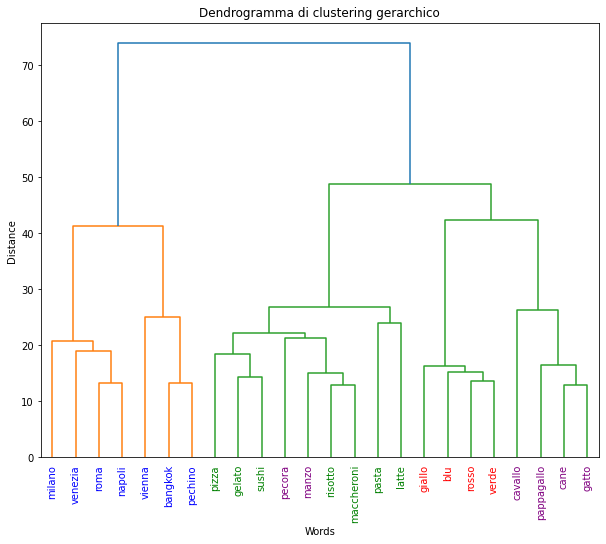

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

data_colormap = {}
for k,v in categories.items():
    for d in v:
        data_colormap[d.lower()] = color_map[k]

Z = linkage(word_vectors, 'ward')


plt.figure(figsize=(10, 8))
dendrogram(Z, labels=words, leaf_rotation=90)

ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(data_colormap[lbl.get_text()])

plt.title("Dendrogramma di clustering gerarchico")
plt.xlabel("Words")
plt.ylabel("Distance")
plt.show()


### Associazioni analogiche

Un tipico gioco con cui possiamo testare le nostre nozioni di associazione fra le parole è la costruzione di analogie, come ad esempio:

>"uomo" sta a "donna" come "re" sta a...

ovviamente, la risposta attesa è...

Chiediamolo al nostro modello! `Gensim` offre un'interfaccia facilissima da usare per estrarre questa informazione dal modello. Basta scrivere l'interrogazione in una forma simil-matematica:

>"re" + "donna" - "uomo"

Ovvero: se togli `uomo` a `re` e gli aggiungi `donna` cosa ottieni? Vediamo le 5 parole che si avvicinano di più alla posizione occupata dal punto al centro di questo spazio.

In [15]:
result = model.most_similar(positive=["re", "donna"], 
                            negative=['uomo'], topn=5)
for word, score in result:
    print(f"{word} ({score:.3f})")


regina (0.674)
principessa (0.667)
consorte (0.656)
concubina (0.599)
sovrana (0.589)


Proviamo un altro esempio, che coinvolge `infermiera : donna` = `uomo : x` I risultati sono... sorprendenti!

In [7]:
result = model.most_similar(positive=["infermiera", "uomo"], negative=['donna'], topn=5)

for word, score in result:
    print(f"{word} ({score:.3f})")


assassino (0.722)
inserviente (0.719)
ematologo (0.717)
agente (0.714)
ispettore (0.700)


I risultati sono un caso di scuola di *bias* (pregiudizi) che sono anch'essi incorporati ("embedded") nel modello. La parola che ci aspettavamo ("infermiere") non è rappresentata nei top 5. In compenso, otteniamo delle associazioni stereotipiche (sia positive che negative) per i mestieri da uomo:
- "inserviente" aggiunge un tono denigratorio e svalutante al mestiere di partenza (infermiera); se un uomo è associato a quel mestiere deve essere esplicitamente un subordinato
- "ematologo", di contro, è un dottore: un uomo deve fare il dottore
- le associazioni più sorprendenti sono con i mestieri "da uomo" che coinvolgono la forza o la violenza!